In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# load and import dataset using pandas

df = pd.read_csv('~/Downloads/bwq.csv')

In [3]:
df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,08/30/2013 08:00:00 AM,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
1,Ohio Street Beach,05/26/2016 01:00:00 PM,14.4,1.23,NaN,0.111,4.0,12.4,05/26/2016 1:00 PM,OhioStreetBeach201605261300
2,Calumet Beach,09/03/2013 04:00:00 PM,23.2,3.63,1.201,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
3,Calumet Beach,05/28/2014 12:00:00 PM,16.2,1.26,1.514,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
4,Montrose Beach,05/28/2014 12:00:00 PM,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   34923 non-null  object 
 1   Measurement Timestamp        34917 non-null  object 
 2   Water Temperature            34917 non-null  float64
 3   Turbidity                    34917 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  34690 non-null  float64
 6   Wave Period                  34690 non-null  float64
 7   Battery Life                 34917 non-null  float64
 8   Measurement Timestamp Label  34917 non-null  object 
 9   Measurement ID               34923 non-null  object 
dtypes: float64(6), object(4)
memory usage: 2.7+ MB


In [5]:
df.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,34917.000000,34917.000000,10034.000000,34690.000000,34690.000000,34917.000000
mean,19.363387,4.823575,1.570235,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,0.175118,12220.244835,12220.696864,0.771769
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,4.800000
25%,17.100000,0.660000,1.426000,0.110000,3.000000,10.600000
50%,19.600000,1.260000,1.578000,0.154000,3.000000,11.000000
75%,22.000000,2.540000,1.721000,0.201000,4.000000,11.500000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000


In [6]:
df = df.drop(columns='Transducer Depth').dropna()

In [7]:
df.isna().any().any()

False

In [8]:
calumet_df = df[(df['Wave Height'] > 0) & (df['Wave Period'] > 0) & (df['Beach Name'] == 'Calumet Beach')]

In [9]:
calumet_df

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
2,Calumet Beach,09/03/2013 04:00:00 PM,23.2,3.63,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
3,Calumet Beach,05/28/2014 12:00:00 PM,16.2,1.26,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
6,Calumet Beach,05/28/2014 01:00:00 PM,16.3,1.28,0.162,4.0,11.7,5/28/2014 1:00 PM,CalumetBeach201405281300
8,Calumet Beach,05/28/2014 02:00:00 PM,16.5,1.32,0.185,4.0,11.7,5/28/2014 2:00 PM,CalumetBeach201405281400
9,Calumet Beach,05/28/2014 03:00:00 PM,16.8,1.31,0.196,4.0,11.7,5/28/2014 3:00 PM,CalumetBeach201405281500
...,...,...,...,...,...,...,...,...,...
33440,Calumet Beach,09/20/2016 09:00:00 AM,19.2,0.93,0.359,3.0,9.4,09/20/2016 9:00 AM,CalumetBeach201609200900
33447,Calumet Beach,09/20/2016 10:00:00 AM,19.4,0.89,0.378,4.0,9.4,09/20/2016 10:00 AM,CalumetBeach201609201000
33449,Calumet Beach,09/20/2016 11:00:00 AM,19.7,0.95,0.386,3.0,9.4,09/20/2016 11:00 AM,CalumetBeach201609201100
33451,Calumet Beach,09/20/2016 12:00:00 PM,21.5,3.77,0.387,3.0,9.4,09/20/2016 12:00 PM,CalumetBeach201609201200


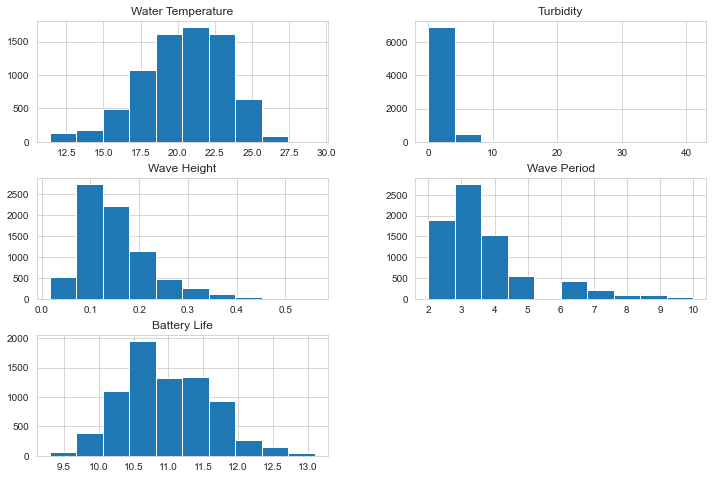

In [13]:
calumet_df.hist(figsize=(12,8));

In [16]:
calumet_df.Turbidity.max()

41.04